<a href="https://colab.research.google.com/github/pajonnakuti/pyDataviz/blob/main/RidgePlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [14]:
# === Load data ===
temp = pd.read_csv("/content/gdrive/MyDrive/PyDataViz/sst_daily_stats_BoB_AS_1981_2025.csv")
temp['month_num'] = pd.to_datetime(temp['Date']).dt.month

# Month dictionary
month_dict = {
    1: 'january', 2: 'february', 3: 'march', 4: 'april',
    5: 'may', 6: 'june', 7: 'july', 8: 'august',
    9: 'september', 10: 'october', 11: 'november', 12: 'december'
}
month_order = list(month_dict.values())


In [15]:
temp

,Date,Region,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,month_num
0,9/1/1981,ArabianSea,33.74,27.13,18.67,9
1,9/2/1981,ArabianSea,33.93,27.13,18.00,9
2,9/3/1981,ArabianSea,33.77,27.21,18.12,9
3,9/4/1981,ArabianSea,33.61,27.27,18.61,9
4,9/5/1981,ArabianSea,33.61,27.24,17.92,9
...,...,...,...,...,...,...
32037,8/14/2025,BayOfBengal,30.88,29.03,27.10,8
32038,8/15/2025,BayOfBengal,30.69,29.02,26.82,8
32039,8/16/2025,BayOfBengal,31.87,28.97,26.61,8
32040,8/17/2025,BayOfBengal,31.63,28.97,26.68,8


In [16]:
# Add month name
temp['month'] = temp['month_num'].map(month_dict)
temp['month'] = pd.Categorical(temp['month'], categories=month_order, ordered=True)

# Color palette
pal = sns.color_palette(palette="coolwarm", n_colors=12)

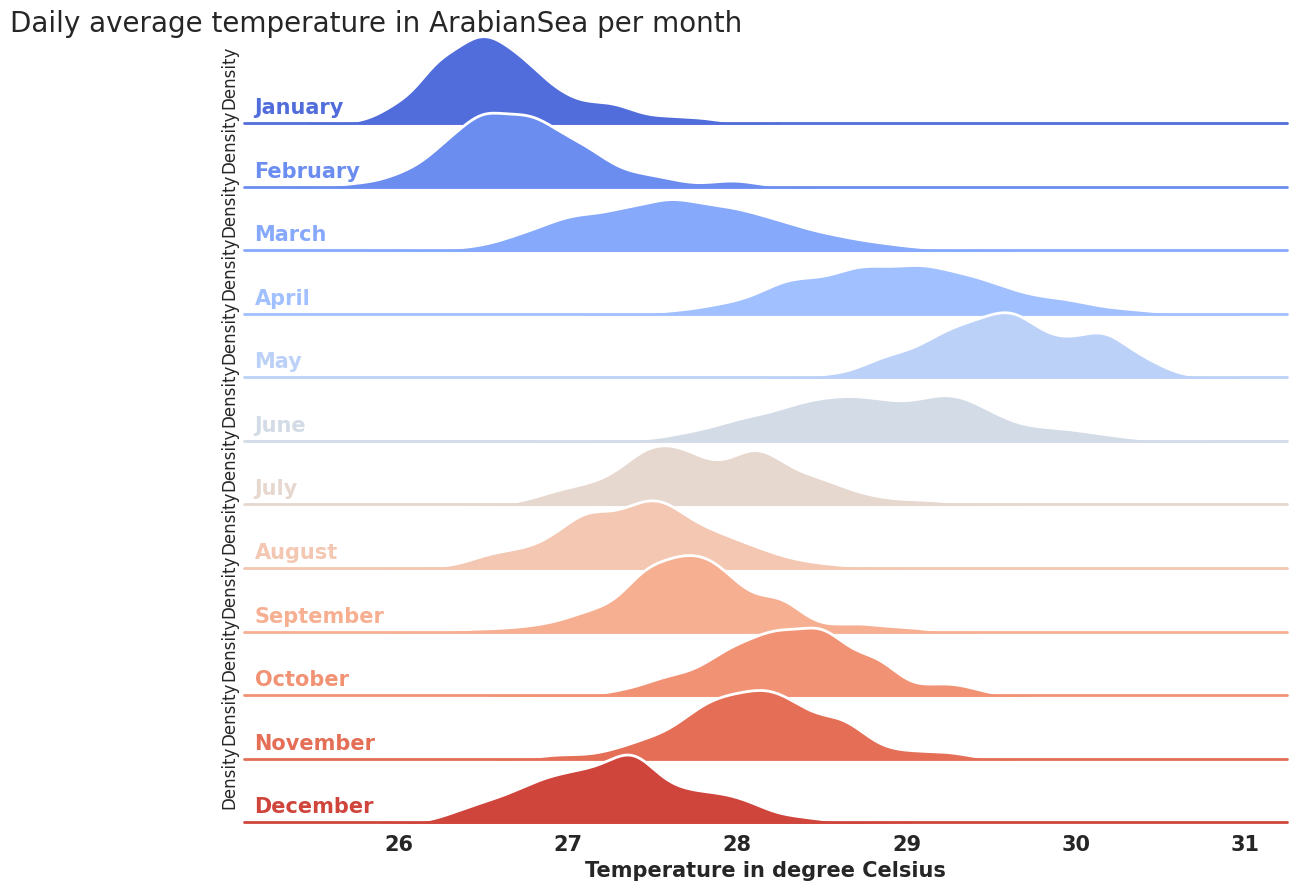

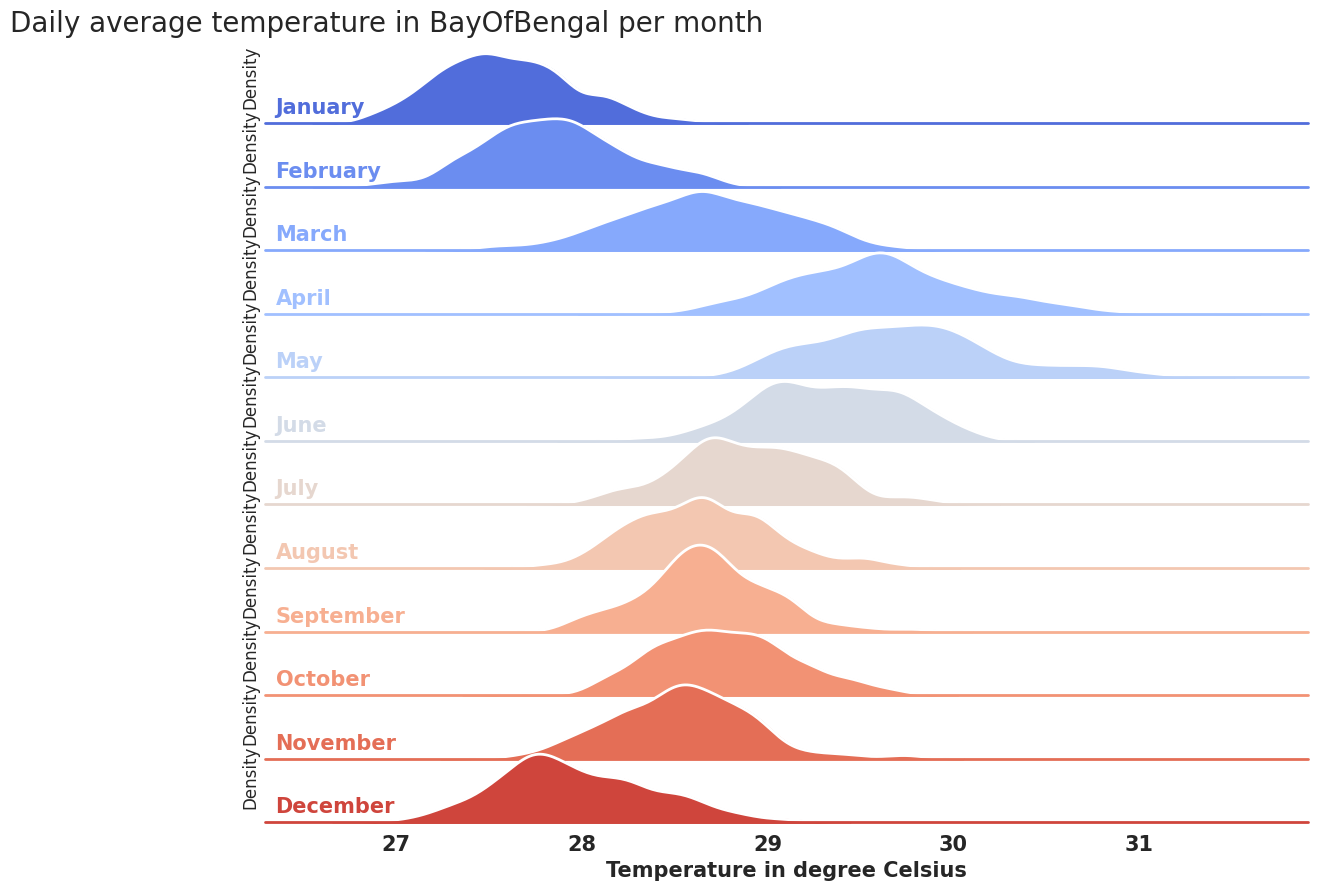

In [17]:
# === Loop over both regions ===
for region in ["ArabianSea", "BayOfBengal"]:
    df = temp[temp['Region'] == region].copy()

    # Compute mean temp per month for coloring
    month_mean_serie = df.groupby('month', observed=True)['Mean_TemperatureC'].mean()
    df['mean_month'] = df['month'].map(month_mean_serie)

    # === FacetGrid ===
    g = sns.FacetGrid(df, row='month', hue='mean_month',
                      aspect=15, height=0.75, palette=pal)

    # KDE plots
    g.map(sns.kdeplot, 'Mean_TemperatureC',
          bw_adjust=1, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, 'Mean_TemperatureC',
          bw_adjust=1, clip_on=False,
          color="w", lw=2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Add month labels (using g.row_names → guaranteed safe)
    for ax, row_val in zip(g.axes.flat, g.row_names):
        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()
        ax.text(x_min + (x_max - x_min) * 0.01,
                y_max * 0.1,
                row_val.capitalize(),
                fontweight='bold', fontsize=15,
                color=ax.lines[-1].get_color())

    # Adjustments
    g.fig.subplots_adjust(hspace=-0.3)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

    plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
    plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
    g.fig.suptitle(f"Daily average temperature in {region} per month",
                   ha='right', fontsize=20, fontweight=20)

    plt.show()